In [18]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [44]:
# filter for US Data Analyst roles
df_DA_US = df[
    (df['job_country'] == 'United States') &
    (df['job_title_short'] == 'Data Analyst')
].copy()

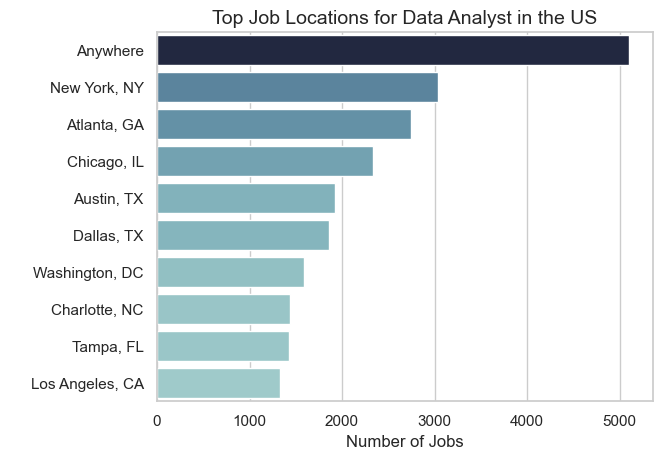

In [46]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style = 'whitegrid')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'ch:rot=-.25,hue=1,light=.75')
plt.legend().remove()
plt.title('Top Job Locations for Data Analyst in the US', fontsize=14)
plt.xlabel('Number of Jobs')
plt.ylabel(' ')
plt.show()

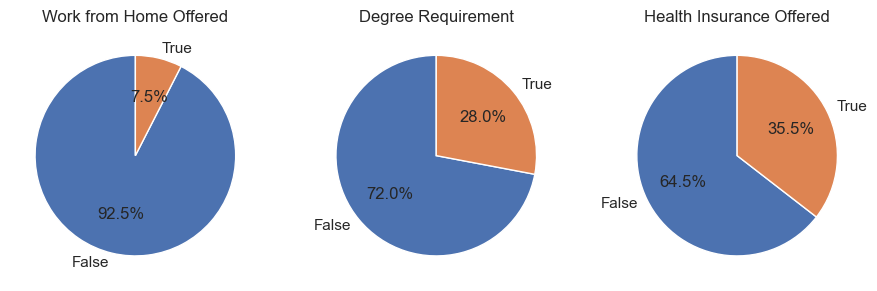

In [47]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

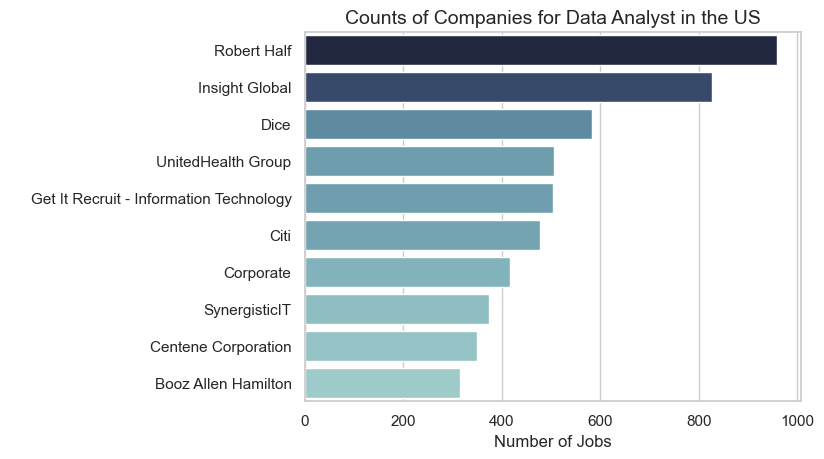

In [49]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'whitegrid')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'ch:rot=-.25,hue=1,light=.75')
plt.legend().remove()
plt.title('Counts of Companies for Data Analyst in the US', fontsize=14)
plt.xlabel('Number of Jobs')
plt.ylabel(' ')
plt.show()